    Md Abir Hossen
    Graduate Research Assistant
    South Dakota School of Mines and Technology
    E-mail: abir.hossen@mines.sdsmt.edu

### Total Nitrogen Estimation in Agricultural Soils via Aerial Multispectral Imaging and LIBS

### Defining libraies

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVC,SVR
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split,cross_val_score
import itertools
import warnings
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from evolutionary_search import EvolutionaryAlgorithmSearchCV
from scipy.stats import randint as sp_randint
import scipy.stats as stats
from random import randrange as sp_randrange
from math import sqrt
warnings.filterwarnings('ignore')
np.set_printoptions(precision=2)
%matplotlib inline

### Calibration- linear regression

In [3]:
x_intensity = np.array([574.1, 405.3,  199.8,  293]).reshape(-1, 1) 
y_nitrogen = np.array([1153,  980,  605,  752]).reshape(-1, 1) 
model = LinearRegression().fit(x_intensity, y_nitrogen)
y_pred = model.predict(x_intensity)
print('predicted response:', y_pred, sep='\n')

predicted response:
[[1179.39]
 [ 927.98]
 [ 621.91]
 [ 760.72]]


In [4]:
print('intercept:', model.intercept_)
print('slope:', model.coef_)
r_sq = model.score(x_intensity, y_nitrogen)
rmse = sqrt(mean_squared_error(y_nitrogen, y_pred))
print('R^2:', r_sq)
print('rmse: ', rmse)

intercept: [324.33]
slope: [[1.49]]
R^2: 0.9786488453460379
rmse:  30.677704161589517


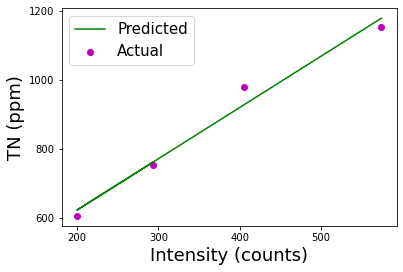

In [5]:
plt.scatter(x_intensity, y_nitrogen, color='m', label='Actual')
plt.plot(x_intensity, y_pred, color='g', label='Predicted')
plt.ylabel('TN (ppm)', fontsize=18)
plt.xlabel('Intensity (counts)', fontsize=18)
plt.legend(prop={'size': 15})
plt.rc('xtick', labelsize=18) 
plt.rc('ytick', labelsize=18)
plt.show()

### Converting peak intensity of N spectrum to actual total nitrogen for all samples obtained from LIBS

In [6]:
x_intensity_data = np.array([574.1, 545.4,  516.7, 
                             63.2, 60.04, 57.04, 
                             547.3, 519.9, 493.9,
                             293, 278.3, 264.4, 
                             405.3, 385, 365.8,
                             431.6, 412.6, 392,
                             477.9, 454, 431.3,
                             420.7, 399.7, 379.7,
                             387.2, 367.9, 349.5,
                             349.7, 340.8, 332.2,
                             293.2, 278.5, 264.6,
                             412.6, 392, 372.4,
                             239, 234.2, 231.8,
                             199.8, 189.8, 170.9,
                             183.9, 174.7, 160.8,
                             170.4, 161.9, 148.9,
                             146.6, 139.3, 128.1,
                             206.3, 196, 180.3]).reshape(-1, 1) 
 
y_pred = model.predict(x_intensity_data)
print('predicted response:', y_pred, sep='\n')

predicted response:
[[1179.39]
 [1136.64]
 [1093.9 ]
 [ 418.46]
 [ 413.75]
 [ 409.28]
 [1139.47]
 [1098.66]
 [1059.94]
 [ 760.72]
 [ 738.83]
 [ 718.12]
 [ 927.98]
 [ 897.75]
 [ 869.15]
 [ 967.15]
 [ 938.85]
 [ 908.17]
 [1036.11]
 [1000.51]
 [ 966.7 ]
 [ 950.92]
 [ 919.64]
 [ 889.85]
 [ 901.02]
 [ 872.28]
 [ 844.87]
 [ 845.17]
 [ 831.91]
 [ 819.11]
 [ 761.02]
 [ 739.13]
 [ 718.42]
 [ 938.85]
 [ 908.17]
 [ 878.98]
 [ 680.29]
 [ 673.15]
 [ 669.57]
 [ 621.91]
 [ 607.02]
 [ 578.87]
 [ 598.23]
 [ 584.53]
 [ 563.82]
 [ 578.12]
 [ 565.46]
 [ 546.1 ]
 [ 542.67]
 [ 531.8 ]
 [ 515.12]
 [ 631.59]
 [ 616.25]
 [ 592.87]]


### Loading the dataset- Multispectral characteristics of the soil and crops in red, near-infrared, and green spectral bands, computedvegetation indices, and environmental variables including air temperature and relative humidity

In [45]:
df = pd.read_csv('dataset_multispectral_features.csv')
df

,RED (DN),NIR (DN),Green (DN),ndvi,RH (%),Temp (C),Nitrogen (ppm)
0,47.88,328.05,54.90,0.74,33.8,23.2,1179.39
1,51.99,329.97,56.50,0.72,33.8,23.2,1136.64
2,52.37,325.90,56.14,0.72,33.8,23.2,1093.90
3,55.81,200.32,43.11,0.56,33.8,23.2,418.46
4,59.30,209.11,45.47,0.55,33.8,23.2,413.75
5,56.36,208.75,44.72,0.57,33.8,23.2,409.28
6,74.64,223.63,52.27,0.50,33.8,23.2,1139.47
7,78.95,229.52,54.50,0.49,33.8,23.2,1098.66
8,79.21,230.47,55.09,0.49,33.8,23.2,1059.94
9,85.53,226.03,55.86,0.44,33.8,23.2,760.72


### Defining inputs and target

In [9]:
input_ndvi = df['ndvi']
input_red = df['RED (DN)']
input_NIR = df['NIR (DN)']
input_Green = df['Green (DN)']
input_RH = df['RH (%)']
input_Temp = df['Temp (C)']
X_input = np.array([input_ndvi, input_red,  input_NIR, input_Green, input_RH, input_Temp])
X_input = X_input.transpose()
Y_target = np.array(df['Nitrogen (ppm)'])

### Test-train data split

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X_input, Y_target, train_size=0.80, test_size=0.20, random_state=123)
print('Train/Test Sizes : ', X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

Train/Test Sizes :  (43, 6) (11, 6) (43,) (11,)


### ML model, hyper-parameter optimization

#### MLP Default 

RMSE: 190.61
Actual: [673.15 844.87 621.91 889.85 897.75 563.82 592.87 718.12 531.8  542.67]
Predicted: [838.47 931.3  824.68 878.28 790.56 882.18 743.57 760.1  739.79 665.61]


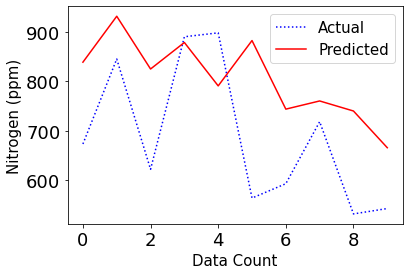

Wall time: 154 ms


In [12]:
%%time

mlp_regressor  = MLPRegressor(random_state=123)
mlp_regressor.fit(X_train, Y_train)
Y_preds = mlp_regressor.predict(X_test)
test_rmse_MLP_default = sqrt(mean_squared_error(Y_test, Y_preds))

mlp_default_actual = Y_test[:10]
mlp_default_predicted = Y_preds[:10]

print("RMSE:", np.round(test_rmse_MLP_default,2))
print("Actual:", mlp_default_actual)
print("Predicted:", mlp_default_predicted)
# Predict for test data
plt.plot(mlp_default_actual, ':', color='b', label='Actual')
plt.plot(mlp_default_predicted,  color='r',  label='Predicted')
plt.legend(prop={'size': 15})
plt.ylabel('Nitrogen (ppm)', fontsize=15)
plt.xlabel('Data Count', fontsize=15)
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15)
plt.show()

#### MLP GridSearch

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:    3.3s finished


Best Parameters :  {'activation': 'logistic', 'hidden_layer_sizes': 50, 'learning_rate': 'constant', 'solver': 'lbfgs'}
RMSE: 111.05
Actual: [673.15 844.87 621.91 889.85 897.75 563.82 592.87 718.12 531.8  542.67]
Predicted: [649.65 895.61 585.68 908.41 908.41 585.68 585.68 946.23 585.68 585.68]


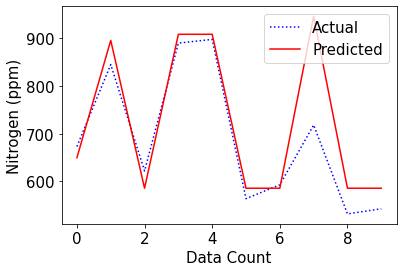

Wall time: 3.58 s


In [13]:
%%time
params = {'activation': ['relu', 'tanh', 'logistic', 'identity'],
          'hidden_layer_sizes':[10, 50,150],
          'solver': ['adam', 'lbfgs'],
          'learning_rate' : ['constant', 'adaptive', 'invscaling']
         }

mlp_regressor_grid = GridSearchCV(MLPRegressor(random_state=123, max_iter=200), param_grid=params,n_jobs=-1, cv=5, verbose=5, scoring='neg_mean_squared_error')
mlp_regressor_grid.fit(X_train,Y_train)
test_rmse_MLP_grid = sqrt(mean_squared_error(Y_test, mlp_regressor_grid.predict(X_test)))

print('Best Parameters : ',mlp_regressor_grid.best_params_)
print("RMSE:", np.round(test_rmse_MLP_grid,2))


# Predict for test data
Y_preds = mlp_regressor_grid.predict(X_test)
mlp_grid_predicted = Y_preds[:10]
mlp_grid_actual = Y_test[:10]
print("Actual:", mlp_grid_actual)
print("Predicted:", mlp_grid_predicted)
plt.plot(mlp_grid_actual,  ':', color='b', label='Actual')
plt.plot(mlp_grid_predicted, color='r',  label='Predicted')
plt.legend(prop={'size': 15})
plt.ylabel('Nitrogen (ppm)', fontsize=15)
plt.xlabel('Data Count', fontsize=15)
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15)
plt.show()

#### MLP RandomSearch

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 110 out of 125 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:    0.8s finished


Best Parameters:  {'activation': 'logistic', 'hidden_layer_sizes': 76, 'learning_rate': 'adaptive', 'solver': 'lbfgs'}
RMSE: 103.29
Actual: [673.15 844.87 621.91 889.85 897.75 563.82 592.87 718.12 531.8  542.67]
Predicted: [657.71 889.51 636.18 889.51 963.43 636.18 636.18 911.05 636.18 636.18]


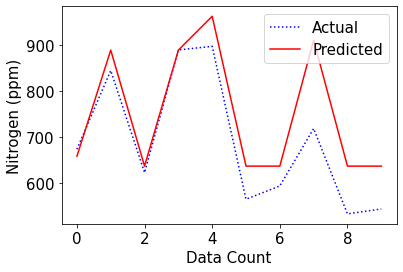

Wall time: 1.12 s


In [39]:
%%time
params = {'activation': ['relu', 'tanh', 'logistic', 'identity'],
          'hidden_layer_sizes': sp_randint(10, 150),
          'solver': ['lbfgs', 'adam'],
          'learning_rate' : ['constant', 'adaptive', 'invscaling'],
         }

n_iter_search=25

mlp_regressor_random = RandomizedSearchCV(MLPRegressor(random_state=123), param_distributions=params, n_iter=n_iter_search, cv=5, verbose=5,n_jobs=-1)
mlp_regressor_random.fit(X_train,Y_train)
MLP_r2_score_random = mlp_regressor_random.best_estimator_.score(X_test, Y_test)
test_rmse_MLP_random = sqrt(mean_squared_error(Y_test, mlp_regressor_random.predict(X_test)))

print('Best Parameters: ',mlp_regressor_random.best_params_)
print("RMSE:", np.round(test_rmse_MLP_random,2))

# Predict for test data
Y_preds = mlp_regressor_random.predict(X_test)
mlp_random_predicted = Y_preds[:10]
mlp_random_actual = Y_test[:10]
print("Actual:", mlp_random_actual)
print("Predicted:", mlp_random_predicted)
plt.plot(mlp_random_actual, ':', color='b', label='Actual')
plt.plot(mlp_random_predicted, color='r', label='Predicted')
plt.legend(prop={'size': 15})
plt.ylabel('Nitrogen (ppm)', fontsize=15)
plt.xlabel('Data Count', fontsize=15)
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15)
plt.show()

#### MLP GeneticAlgorithm

Types [1, 1, 1, 1] and maxint [3, 139, 1, 2] detected
--- Evolve in 3360 possible combinations ---
[CV] activation=identity, hidden_layer_sizes=102, solver=adam, learning_rate=invscaling 
[CV]  activation=identity, hidden_layer_sizes=102, solver=adam, learning_rate=invscaling, score=-0.112, total=   0.0s
[CV] activation=identity, hidden_layer_sizes=102, solver=adam, learning_rate=invscaling 
[CV]  activation=identity, hidden_layer_sizes=102, solver=adam, learning_rate=invscaling, score=-4.054, total=   0.0s
[CV] activation=identity, hidden_layer_sizes=102, solver=adam, learning_rate=invscaling 
[CV]  activation=identity, hidden_layer_sizes=102, solver=adam, learning_rate=invscaling, score=-1.186, total=   0.0s
[CV] activation=identity, hidden_layer_sizes=102, solver=adam, learning_rate=invscaling 
[CV]  activation=identity, hidden_layer_sizes=102, solver=adam, learning_rate=invscaling, score=-0.960, total=   0.0s
[CV] activation=identity, hidden_layer_sizes=102, solver=adam, learning_r

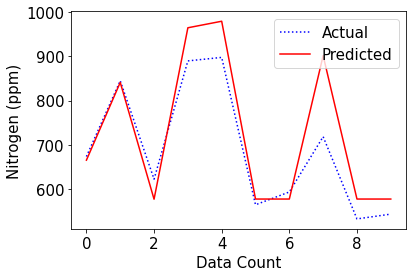

Wall time: 9.51 s


In [19]:
%%time
params = {'activation': ['relu', 'tanh', 'logistic', 'identity'],
          'hidden_layer_sizes': range(10, 150),
          'solver': ['lbfgs', 'adam'],
          'learning_rate' : ['constant', 'adaptive', 'invscaling'],
         }

mlp_regressor = MLPRegressor(random_state=123)
mlp_regressor_genetic = EvolutionaryAlgorithmSearchCV(estimator=mlp_regressor,
                                   params=params,
                                   cv=5,
                                   verbose=5,
                                   population_size=20,
                                   gene_mutation_prob=0.10,
                                   gene_crossover_prob=0.5,
                                   tournament_size=3,
                                   generations_number=5,
                                   n_jobs=1)

mlp_regressor_genetic.fit(X_input, Y_target)
test_rmse_MLP_genetic = sqrt(mean_squared_error(Y_test, mlp_regressor_genetic.predict(X_test)))
rmspe_GA = (sqrt(np.mean(np.square((Y_test - mlp_regressor_genetic.predict(X_test)) / Y_test)))) * 100

print(mlp_regressor_genetic.best_params_)
print('Best Parameters : ',mlp_regressor_genetic.best_params_)
print("RMSE:", np.round(test_rmse_MLP_genetic,2))
print("RMSPE: ",rmspe_GA)

# Predict for test data
Y_preds = mlp_regressor_genetic.predict(X_test)
mlp_genetic_predicted = Y_preds[:10]
mlp_genetic_actual = Y_test[:10]
print("Actual:", mlp_genetic_actual)
print("Predicted:", mlp_genetic_predicted)
plt.plot(mlp_genetic_actual, ':', color='b', label='Actual')
plt.plot(mlp_genetic_predicted, color='r', label='Predicted')
plt.legend(prop={'size': 15})
plt.ylabel('Nitrogen (ppm)', fontsize=15)
plt.xlabel('Data Count', fontsize=15)
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15)
plt.show()

#### SVM Deafult

RMSE: 215.84
Actual: [673.15 844.87 621.91 889.85 897.75 563.82 592.87 718.12 531.8  542.67]
Predicted: [831.97 833.95 833.09 834.04 833.11 833.   831.99 831.61 831.61 831.05]


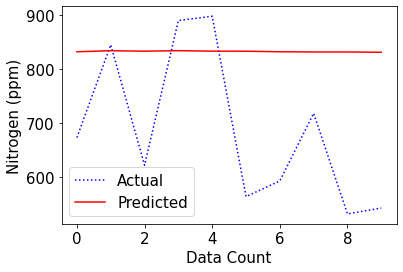

Wall time: 85 ms


In [40]:
%%time
support_reg = SVR(gamma='scale',max_iter=100)
support_reg.fit(X_train, Y_train)
Y_preds = support_reg.predict(X_test)
test_rmse_SVM_default = sqrt(mean_squared_error(Y_test, support_reg.predict(X_test)))
Y_preds = support_reg.predict(X_test)

print("RMSE:", np.round(test_rmse_SVM_default,2))

# Predict for test data
svm_default_predicted = Y_preds[:10]
svm_default_actual = Y_test[:10]
print("Actual:", svm_default_actual)
print("Predicted:", svm_default_predicted)
plt.plot(svm_default_actual, ':', color='b', label='Actual')
plt.plot(svm_default_predicted, color='r', label='Predicted')
plt.legend(prop={'size': 15})
plt.ylabel('Nitrogen (ppm)', fontsize=15)
plt.xlabel('Data Count', fontsize=15)
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15)
plt.show()

#### SVM GridSearch

Fitting 5 folds for each of 75 candidates, totalling 375 fits
Best Parameters :  {'C': 1000, 'epsilon': 1, 'kernel': 'poly'}
RMSE: 126.17
Actual: [673.15 844.87 621.91 889.85 897.75 563.82 592.87 718.12 531.8  542.67]
Predicted: [715.91 795.3  586.21 754.16 872.18 665.43 608.92 911.   641.12 643.44]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 375 out of 375 | elapsed:    0.0s finished


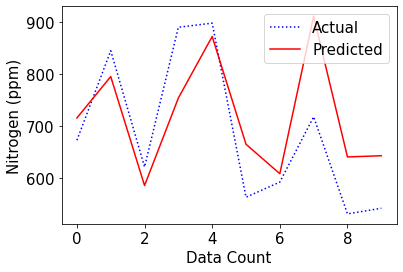

Wall time: 230 ms


In [41]:
%%time
params = {
    'C': [1, 10, 100, 1000, 10000],
    "kernel":['poly', 'rbf', 'sigmoid'],
    "epsilon":[0.0001, 0.001, 0.01, 0.1, 1]
}
support_reg = SVR(gamma = 'scale',max_iter=100)
support_reg_grid = GridSearchCV(support_reg, param_grid=params, n_jobs=-1, cv=5, verbose=5, scoring='neg_mean_squared_error')
support_reg_grid.fit(X_input, Y_target)
test_rmse_SVM_grid = sqrt(mean_squared_error(Y_test, support_reg_grid.predict(X_test)))
Y_preds = support_reg_grid.predict(X_test)

print('Best Parameters : ',support_reg_grid.best_params_)
print("RMSE:", np.round(test_rmse_SVM_grid,2))

# Predict for test data
svm_grid_predicted = Y_preds[:10]
svm_grid_actual = Y_test[:10]
print("Actual:", svm_grid_actual)
print("Predicted:", svm_grid_predicted)
plt.plot(svm_grid_actual, ':', color='b', label='Actual')
plt.plot(svm_grid_predicted, color='r', label='Predicted')
plt.legend(prop={'size': 15})
plt.ylabel('Nitrogen (ppm)', fontsize=15)
plt.xlabel('Data Count', fontsize=15)
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15)
plt.show()

#### SVM RandomSearch

Best Parameters :  {'C': 3242.1663052487906, 'epsilon': 0.010601542865344215, 'kernel': 'poly'}
RMSE: 116.49
Actual: [673.15 844.87 621.91 889.85 897.75 563.82 592.87 718.12 531.8  542.67]
Predicted: [679.32 772.15 552.22 796.09 956.63 599.39 585.76 985.5  615.8  640.24]


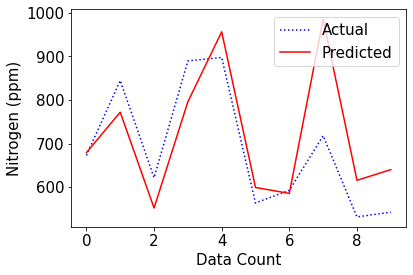

Wall time: 165 ms


In [42]:
%%time
params = {
    "C": stats.uniform(1,10000),
    "kernel":['poly','rbf','sigmoid'],
    "epsilon":stats.uniform(0.0001,1)
}

n_iter_search=30

support_reg = SVR(gamma='scale', max_iter=100)
support_reg_random = RandomizedSearchCV(support_reg, param_distributions=params,n_iter=n_iter_search, n_jobs=-1,  cv=5,  scoring='neg_mean_squared_error')
support_reg_random.fit(X_input, Y_target)
test_rmse_SVM_random = sqrt(mean_squared_error(Y_test, support_reg_random.predict(X_test)))
Y_preds = support_reg_random.predict(X_test)

print('Best Parameters : ',support_reg_random.best_params_)
print("RMSE:", np.round(test_rmse_SVM_random,2))

# Predict for test data
svm_random_predicted = Y_preds[:10]
svm_random_actual = Y_test[:10]
print("Actual:", svm_random_actual)
print("Predicted:", svm_random_predicted)
plt.plot(svm_random_actual, ':', color='b', label='Actual')
plt.plot(svm_random_predicted, color='r', label='Predicted')
plt.legend(prop={'size': 15})
plt.ylabel('Nitrogen (ppm)', fontsize=15)
plt.xlabel('Data Count', fontsize=15)
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15)
plt.show()

#### SVM GeneticAlgorithm

Types [2, 1, 2] and maxint [9999, 2, 0] detected
--- Evolve in 30000 possible combinations ---
[CV] C=625.3245777302432, kernel=sigmoid, epsilon=0.009785739511895689 
[CV]  C=625.3245777302432, kernel=sigmoid, epsilon=0.009785739511895689, score=-159408.797, total=   0.0s
[CV] C=625.3245777302432, kernel=sigmoid, epsilon=0.009785739511895689 
[CV]  C=625.3245777302432, kernel=sigmoid, epsilon=0.009785739511895689, score=-92216.225, total=   0.0s
[CV] C=625.3245777302432, kernel=sigmoid, epsilon=0.009785739511895689 
[CV]  C=625.3245777302432, kernel=sigmoid, epsilon=0.009785739511895689, score=-54028.278, total=   0.0s
[CV] C=625.3245777302432, kernel=sigmoid, epsilon=0.009785739511895689 
[CV]  C=625.3245777302432, kernel=sigmoid, epsilon=0.009785739511895689, score=-45981.568, total=   0.0s
[CV] C=625.3245777302432, kernel=sigmoid, epsilon=0.009785739511895689 
[CV]  C=625.3245777302432, kernel=sigmoid, epsilon=0.009785739511895689, score=-161002.292, total=   0.0s
[CV] C=257.7022112

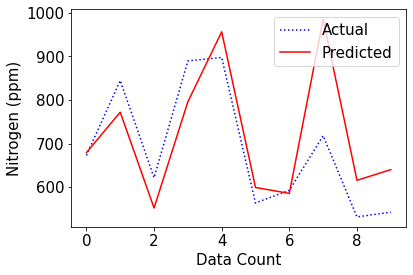

Wall time: 270 ms


In [43]:
%%time
params = {
    'C': np.random.uniform(1,1000,10000),
    "kernel":['poly','rbf','sigmoid'],
    'epsilon': np.random.uniform(0.0001,0.01,1),
}
support_reg = SVR(gamma='scale',max_iter=100)
support_reg_genetic = EvolutionaryAlgorithmSearchCV(estimator=support_reg,
                                   params=params,
                                   scoring="neg_mean_squared_error",
                                   cv=5,
                                   verbose=5,
                                   population_size=20,
                                   gene_mutation_prob=0.10,
                                   gene_crossover_prob=0.5,
                                   tournament_size=3,
                                   generations_number=5,
                                   n_jobs=1)

support_reg_genetic.fit(X_input, Y_target)
test_rmse_SVM_genetic = sqrt(mean_squared_error(Y_test, support_reg_genetic.predict(X_test)))

print('Best Parameters : ',support_reg_genetic.best_params_)
print("RMSE:", np.round(test_rmse_SVM_genetic,2))

# Predict for test data
svm_genetic_predicted = Y_preds[:10]
svm_genetic_actual = Y_test[:10]
print("Actual:", svm_genetic_actual)
print("Predicted:", svm_genetic_predicted)
Y_preds = support_reg_genetic.predict(X_test)
plt.plot(svm_genetic_actual, ':', color='b',  label='Actual')
plt.plot(svm_genetic_predicted, color='r', label='Predicted')
plt.legend(prop={'size': 15})
plt.ylabel('Nitrogen (ppm)', fontsize=15)
plt.xlabel('Data Count', fontsize=15)
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15)
plt.show()

### Total nitrogen predictor for test-dataset

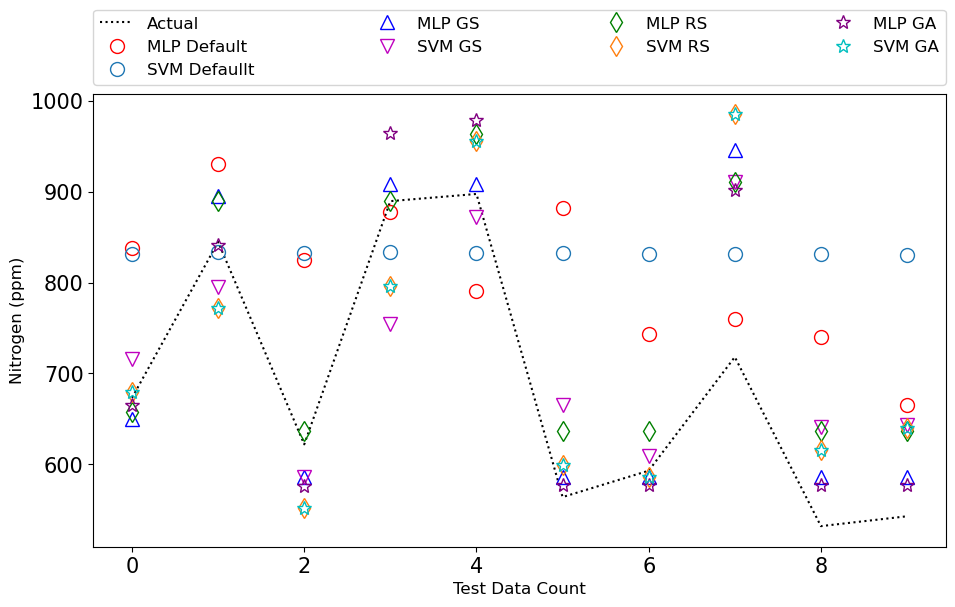

In [44]:
# Predict for test data
plt.rcParams.update({'figure.figsize':(11,6), 'figure.dpi':100})
plt.plot(mlp_default_actual, ls= ':',color='k',  label='Actual')
plt.plot(mlp_default_predicted,ls='None', marker='o', markersize=10,  color='r', fillstyle='none', label='MLP Default')
plt.plot(svm_default_predicted,ls='None', marker='o', markersize=10, color='tab:blue', fillstyle='none',  label='SVM Defaullt')
plt.plot(mlp_grid_predicted, ls='None', marker='^', markersize=10, color='b', fillstyle='none', label='MLP GS')
plt.plot(svm_grid_predicted, ls='None', marker='v',markersize=10, color='m', fillstyle='none', label='SVM GS')
plt.plot(mlp_random_predicted,ls='None',  marker='d',markersize=10, color='g', fillstyle='none', label='MLP RS')
plt.plot(svm_random_predicted, ls='None', marker='d',markersize=10, color='tab:orange', fillstyle='none', label='SVM RS')
plt.plot(mlp_genetic_predicted,ls='None',  marker='*',markersize=10, color='purple', fillstyle='none', label='MLP GA')
plt.plot(svm_genetic_predicted,ls='None',  marker='*',markersize=10, color='c', fillstyle='none', label='SVM GA')
plt.legend(bbox_to_anchor=(0,1.02,1,0.2), loc="lower left",
                mode="expand", borderaxespad=0, ncol=4, prop={'size': 12})
plt.ylabel('Nitrogen (ppm)', fontsize=12)
plt.xlabel('Test Data Count', fontsize=12)
plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=12)
plt.show()